In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
df = pd.read_csv('train.csv')

In [129]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [130]:
df.shape

(8523, 12)

In [131]:
df = df.drop('Item_Identifier',axis=1)
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [132]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [133]:
df['Item_Fat_Content']  = df['Item_Fat_Content'].map({'Low Fat':0, 'Regular':1, 'low fat':0, 'LF':0, 'reg':1})

In [134]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,0,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,0,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,1,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,10.600,0,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,1,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [135]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [136]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['Item_Type'])
df['Item_Type'] = le.transform(df['Item_Type'])

In [137]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,1,0.019278,14,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,0,0.016760,10,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,1,0.000000,6,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,0,0.000000,9,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,1,0.046982,0,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,10.600,0,0.035186,8,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,1,0.145221,13,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [138]:
df = df.drop('Outlet_Identifier',axis=1)

In [139]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,1,0.019278,14,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,0,0.016760,10,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,1,0.000000,6,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,0,0.000000,9,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,1,0.046982,0,108.1570,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,10.600,0,0.035186,8,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,1,0.145221,13,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [140]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [141]:
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].map({'Tier 1':1, 'Tier 3':3, 'Tier 2':2})

In [142]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,1999,Medium,1,Supermarket Type1,3735.1380
1,5.920,1,0.019278,14,48.2692,2009,Medium,3,Supermarket Type2,443.4228
2,17.500,0,0.016760,10,141.6180,1999,Medium,1,Supermarket Type1,2097.2700
3,19.200,1,0.000000,6,182.0950,1998,NaN,3,Grocery Store,732.3800
4,8.930,0,0.000000,9,53.8614,1987,High,3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1987,High,3,Supermarket Type1,2778.3834
8519,8.380,1,0.046982,0,108.1570,2002,NaN,2,Supermarket Type1,549.2850
8520,10.600,0,0.035186,8,85.1224,2004,Small,2,Supermarket Type1,1193.1136
8521,7.210,1,0.145221,13,103.1332,2009,Medium,3,Supermarket Type2,1845.5976


In [143]:
df.drop('Outlet_Type',axis=1,inplace=True)

In [144]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,1999,Medium,1,3735.1380
1,5.920,1,0.019278,14,48.2692,2009,Medium,3,443.4228
2,17.500,0,0.016760,10,141.6180,1999,Medium,1,2097.2700
3,19.200,1,0.000000,6,182.0950,1998,NaN,3,732.3800
4,8.930,0,0.000000,9,53.8614,1987,High,3,994.7052
...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1987,High,3,2778.3834
8519,8.380,1,0.046982,0,108.1570,2002,NaN,2,549.2850
8520,10.600,0,0.035186,8,85.1224,2004,Small,2,1193.1136
8521,7.210,1,0.145221,13,103.1332,2009,Medium,3,1845.5976


In [147]:
df.isnull().any()

Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Item_Outlet_Sales            False
dtype: bool

In [149]:
df = df.drop('Outlet_Size',axis=1)

In [150]:
df.isnull().any()

Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Establishment_Year    False
Outlet_Location_Type         False
Item_Outlet_Sales            False
dtype: bool

In [151]:
df = df.drop('Item_Weight',axis=1)

In [152]:
df.isnull().any()

Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Establishment_Year    False
Outlet_Location_Type         False
Item_Outlet_Sales            False
dtype: bool

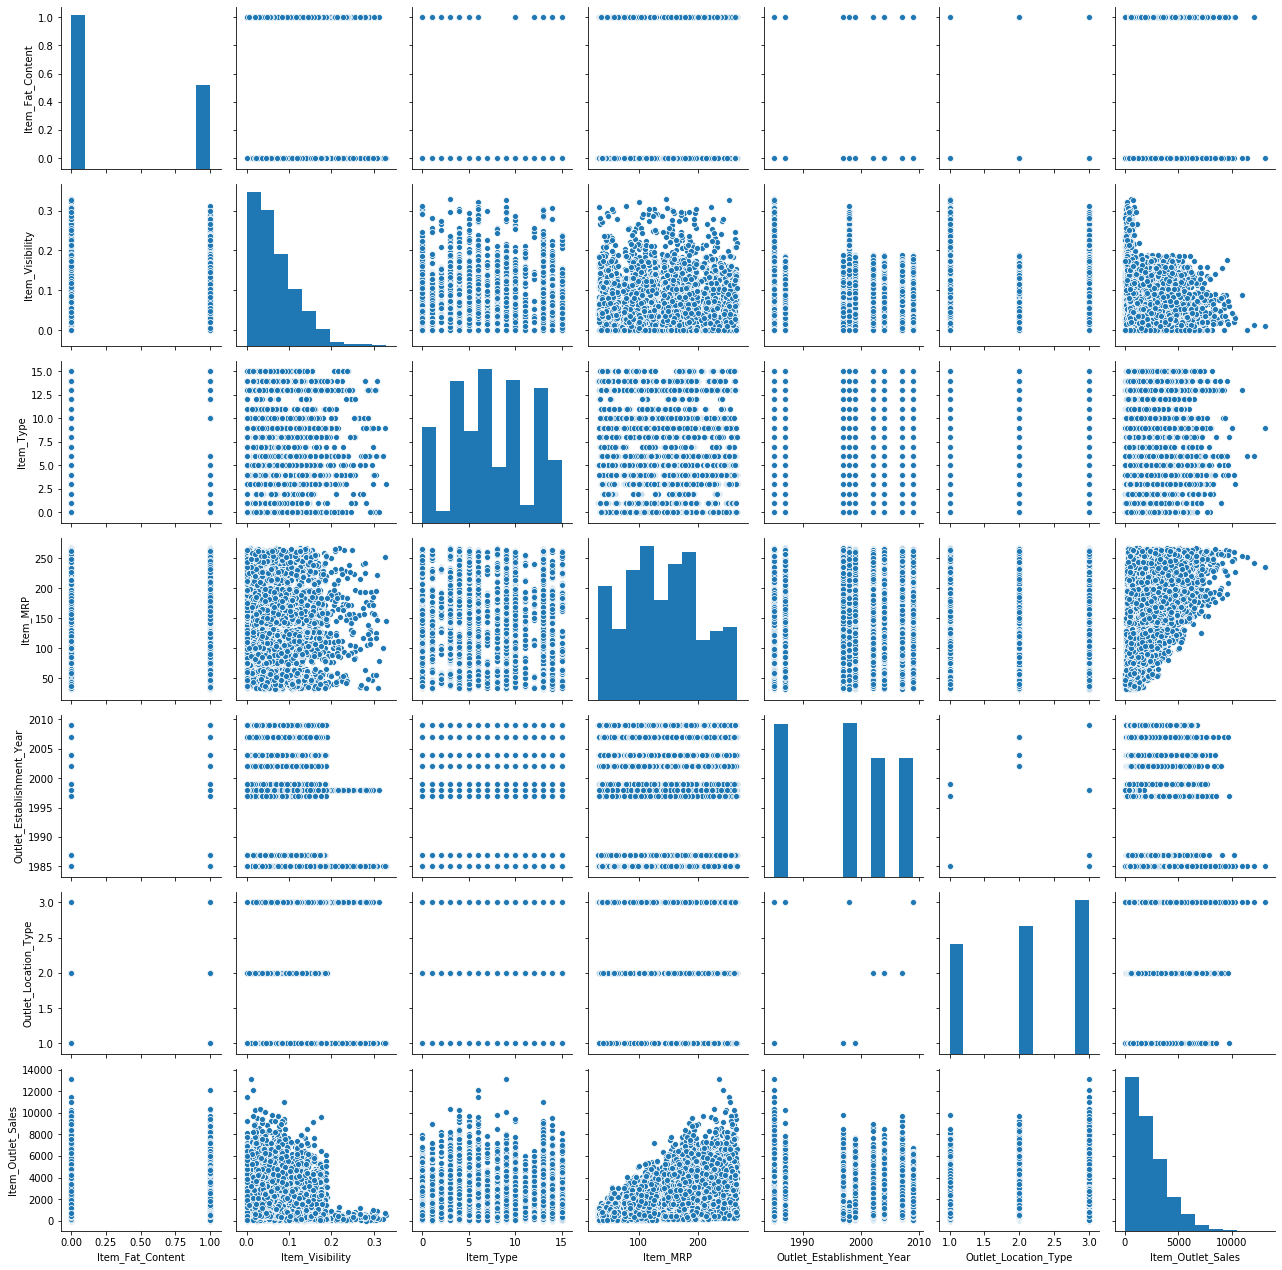

In [163]:
sns.pairplot(data=df)

In [153]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [155]:
pca_df = pca.transform(df)

In [157]:
pca_df.shape

(8523, 2)

In [161]:
pca_df

array([[ 1555.77017575,    76.5888815 ],
       [-1739.41694562,   -56.5950726 ],
       [  -83.98811695,     2.38166007],
       ...,
       [ -989.12246954,   -35.33412742],
       [ -336.40629928,   -30.8060416 ],
       [-1416.67246088,   -36.16077815]])

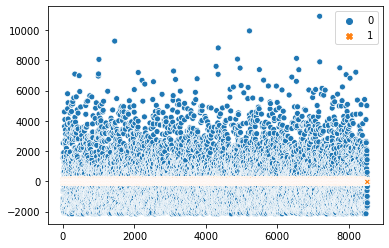

In [165]:
sns.scatterplot(data=pca_df)